<a href="https://colab.research.google.com/github/Udipta24/House-Price-Prediction-Project/blob/main/House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PROJECT 1**
#**House Price Prediction (Boston Housing Dataset)**
Predict house prices using Linear Regression based on features like number of rooms, crime rate, etc.

---
**Step 1:** Import the required libraries

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

---
**Step 2:** Load data from Dataset. This is a ***Boston Housing*** dataset that has been taken from Github, as the dataset has been removed from **Scikit-Learn**. We used the direct url `https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv` to the dataset to read the `.csv` file. Then read the first 5 rows from the dataset.

---

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()
# df.shape

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
**Step 3:** Data Preprocessing. Check for missing values and handle them if any. The `df.isnull().sum()` method provides the column wise count of missing or null values.

---

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


---
**Step 4:** Find out the correlation matrix with `df.corr()` method, then extract the correlation of the target variable with all the features and sort them in non-increasing order.

---

In [ ]:
corr_matrix = df.corr()
corr_matrix['medv'].sort_values(ascending=False)

,medv
medv,1.000000
rm,0.695360
zn,0.360445
b,0.333461
dis,0.249929
chas,0.175260
age,-0.376955
rad,-0.381626
crim,-0.388305
nox,-0.427321


---
**Step 5:** After studying the correlations select the features which are highly correlated either positively or negatively with the target variable `medv`. Separate out the target variable `medv`.

---

In [ ]:
selected_features = ['rm', 'lstat', 'ptratio', 'crim', 'dis']
X = df[selected_features]
y = df['medv']

---
##Data Visualization
---

**Step 6:** Plot the correlation matrix of the `selected_features` and the target variable `[medv](https://)` in the form of a heatmap

---

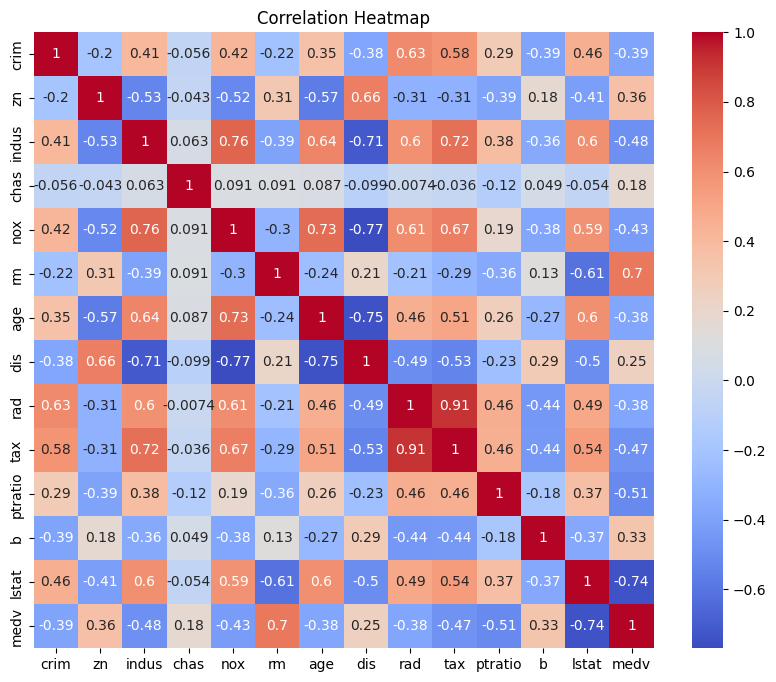

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

---
**Step 7:** Plot scatter plots for all the `selected_features` versus the target variable `medv` to see the relation between the individual `selected_features` and `medv`. With the help of these plots we can choose the proper model for prediction.

---

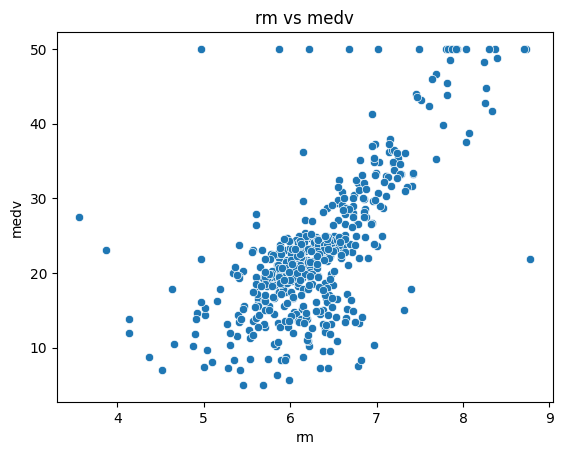

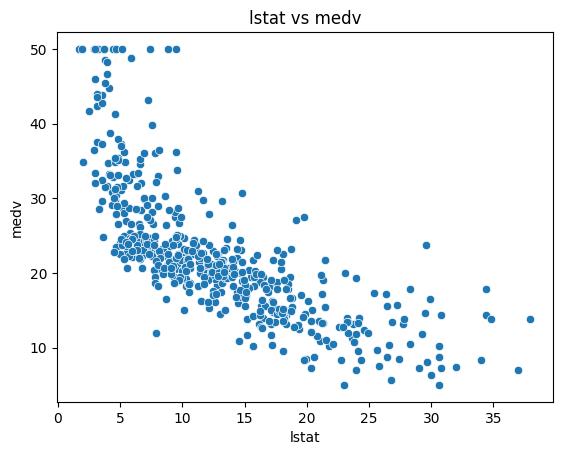

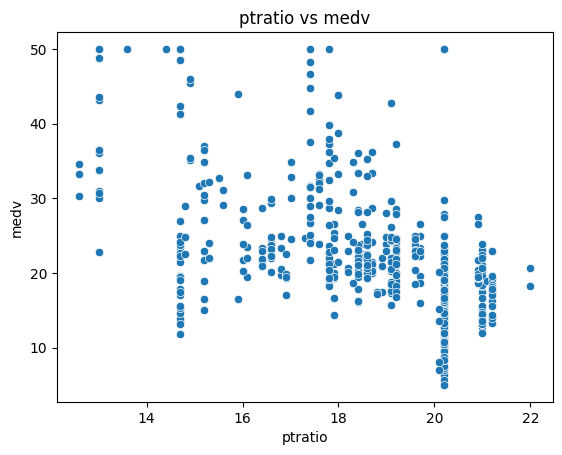

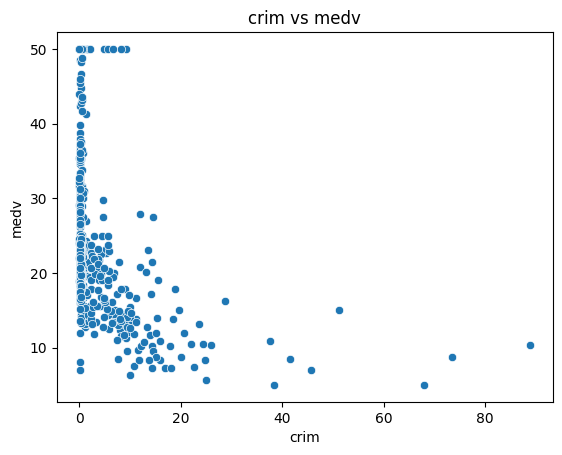

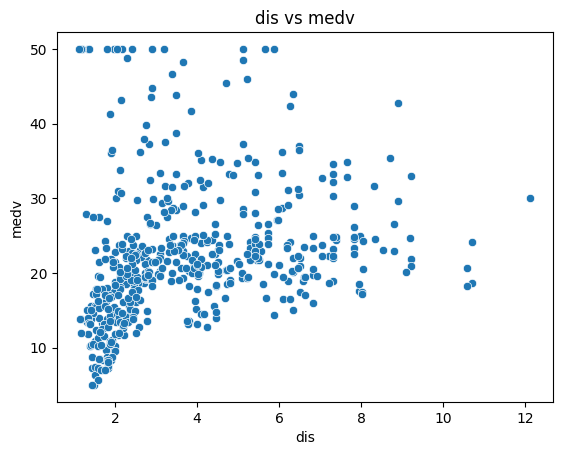

In [ ]:
for feature in selected_features:
    sns.scatterplot(x=df[feature], y=y)
    plt.title(f'{feature} vs medv')
    plt.show()

---
**Step 8:** Plot histograms for all the `selected_features` and the target variable `medv` to visualize their variatins and distribution.

---

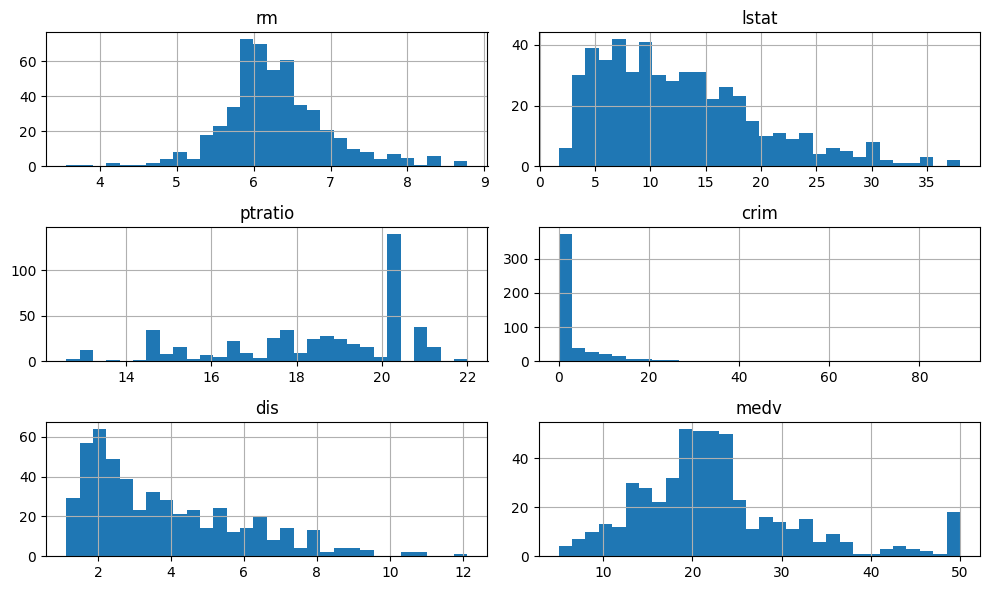

In [ ]:
df[selected_features + ['medv']].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

---
##Model building and training

---

**Step 9:**
* Split the available dataset into **training** set and **testing** set. **Training** set is 80% of the actual dataset and **testing** set is 20% of the actual dataset.
* Choose the **`LinearRegression()`** model available in **Scikit-learn** library, as it has been observed that individual `selected_features` are almost linearly related with the target variable `medv`. Store the model as `model` variable and train the `model` on the **training** set.

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

---
##Prediction and model evaluation

---

**Step 10:** Make the model predict results on the **testing** dataset. Evaluate the model with the help of evaluation metrics such as **MSE (Mean Squared Error)** and **R2 Score**.

---

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

Mean squared error: 27.93226394378899
R-squared score: 0.6191078280698648


---
**Step 11:** Plot a scatter plot showing the actual values vs predicted values and a red dotted line for reference. If the points are clustered around the red line then the model predicts well, else if the points are scattered far away from the line then it implies poor predictions by the model.

---

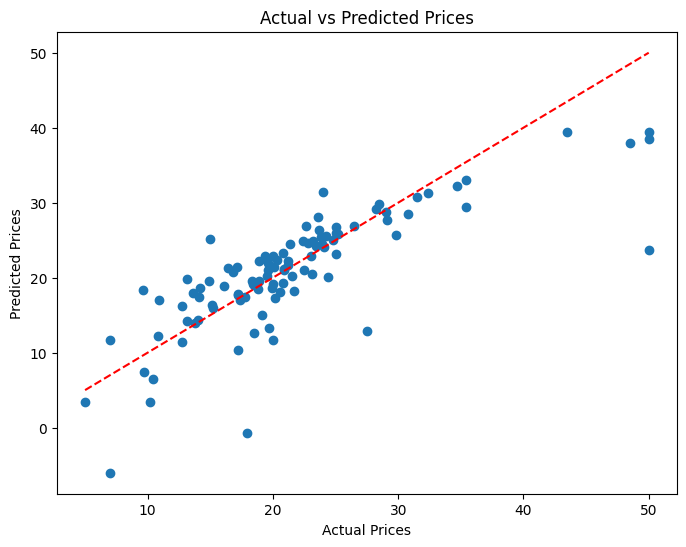

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # red dotted line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()